# Suffix structures

## Input data

In [1]:
text1 = "bbbd"
text2 = "aabbabd"
text3 = "ababcd"
text4 = "abcbccd"

with open("1997_714_head.txt", "r", errors = "ignore") as f:
    text5 = f.read()
pattern = "Art"

## Data preparation
Last char of text should be unique.

In [2]:
def check_unique_char(text):
    letters = set(text[:-1])
    if text[-1] in letters:
        for i in range(33,65):
            if i not in letters:
                return text + chr(i)
    else: return text

In [3]:
check_unique_char(text4)

'abcbccd'

In [4]:
check_unique_char("abcdc")

'abcdc!'

# Suffix trie

In [5]:
class Node:
    def __init__(self, char):
        self.char = char
        self.parent = None
        self.children = {}
        self.depth = 0
    def __repr__(self):
        return str(self.char)
    

In [6]:
def build_trie(text):
    root = Node(None)
    text = check_unique_char(text)
    for i in range(len(text)):
        curr = root
        suffix = text[i:]
        for ch in suffix:
#             print(ch, curr.children)
            if ch not in curr.children:
                new_node = Node(ch)
                new_node.parent = curr
                curr.children[ch] = new_node

            curr = curr.children[ch]
    return root

In [7]:
root = build_trie("aabc")

In [8]:
def find_substring(root, substr):
    curr = root
#     print(substr)
    for ch in substr:
        if ch not in curr.children:
            return False
        else:
            curr = curr.children[ch]
    return True

### Tests

In [9]:
find_substring(root, "zxc")

False

In [10]:
find_substring(root, "ab")

True

In [11]:
def test(text):
    root = build_trie(text)
    for i in range(0, len(text)):
        for j in range(i, len(text)):
            substring = text[i:j+1]
            if not find_substring(root, substring):
                print("Test failed")
                return False
    return True

In [12]:
test("aaba")

True

In [13]:
print(test(text1))
print(test(text2))
print(test(text3))
print(test(text4))
# print(test(text5))

True
True
True
True


### Build time of suffix trie - $O(n^2)$
## Execution time

In [14]:
import matplotlib.pyplot as plt
import time
import string
import random

#### Given data

In [15]:
texts = [text1,text2,text3,text4,text5]

for text in texts:
    start = time.time()
    build_trie(text)
    end = time.time()
    print("Execution time:",end - start)  

Execution time: 0.0
Execution time: 0.0
Execution time: 0.0
Execution time: 0.0
Execution time: 15.924434900283813


#### Random data

In [29]:
times = []
step = 30
el = 50

n = [step * i for i in range(1,el)]

for i in range(1,el):
    letters = string.ascii_lowercase
    text = ''.join(random.choice(letters) for i in range(step * i))
#     print(text)
    start = time.time()
    build_trie(text)
    end = time.time()
    times.append(end - start)  

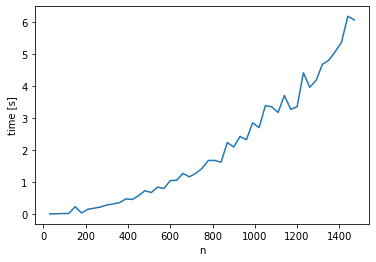

In [30]:
plt.xlabel('n')
plt.ylabel('time [s]')
plt.plot(n, times, label ='Suffix trie building')

As in the plot above, dependence of execution time and length of text is quadratic.

# Suffix tree

In [19]:
# Pokonało mnie :C